In [69]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [70]:

df = pd.read_csv("train.csv")

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
df["Cabin"].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [74]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


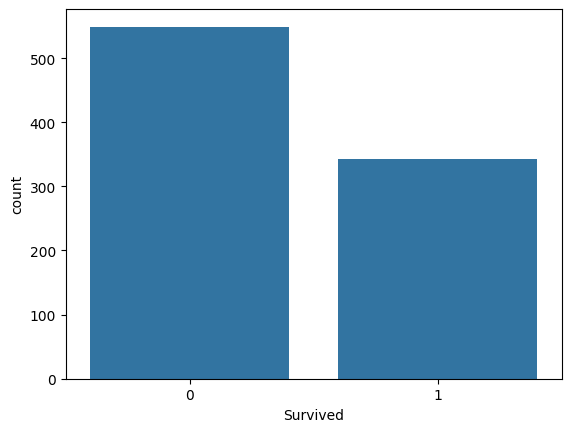

In [75]:
#looking for class imbalance
sns.countplot(x="Survived", data=df)
plt.show()

class is already balanced.

In [76]:
def outlier(df, feature_name):
  Q1 = df[feature_name].quantile(0.20)
  Q3 = df[feature_name].quantile(0.80)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  outliers = df[(df[feature_name]<lower_bound)|(df[feature_name]>upper_bound)]
  sns.boxplot(df[feature_name])
  plt.show()

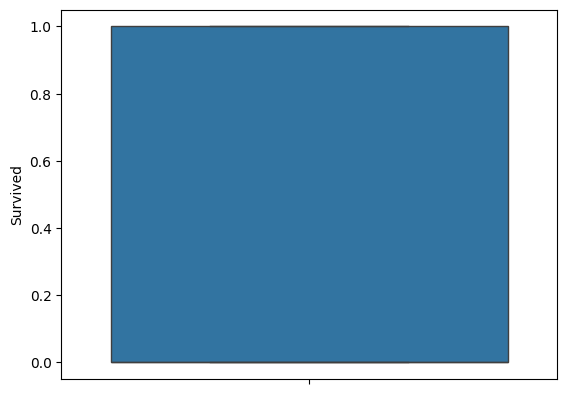

In [77]:
outlier(df, "Survived")

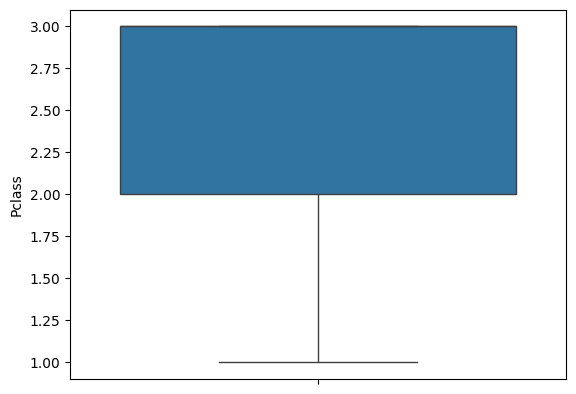

In [78]:
outlier(df, "Pclass")

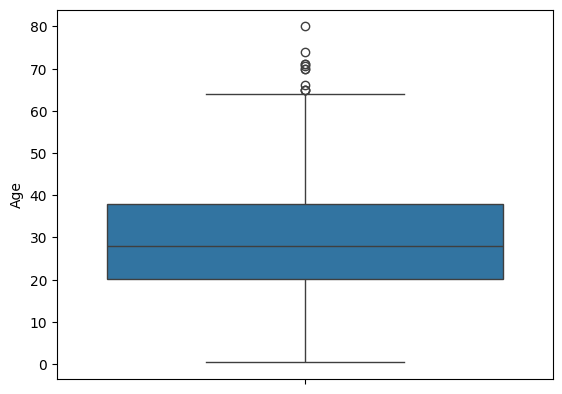

In [79]:
outlier(df, "Age")

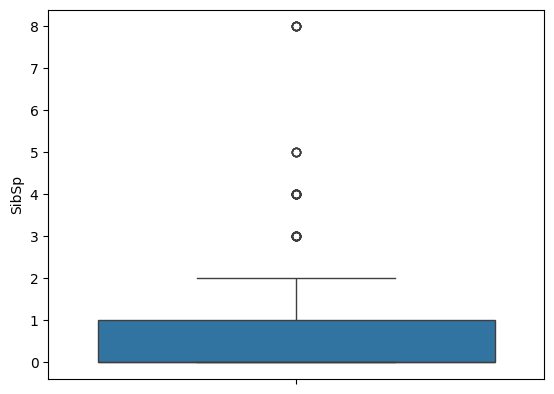

In [80]:
outlier(df, "SibSp")

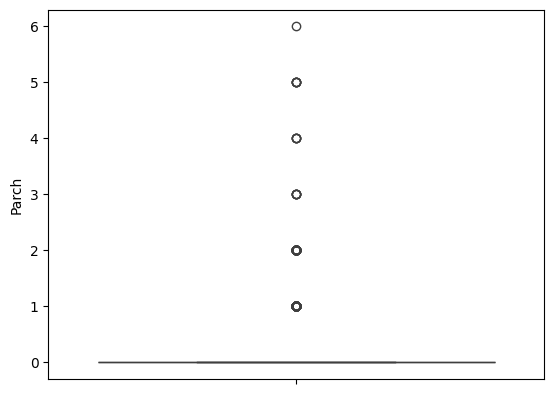

In [81]:
outlier(df, "Parch")

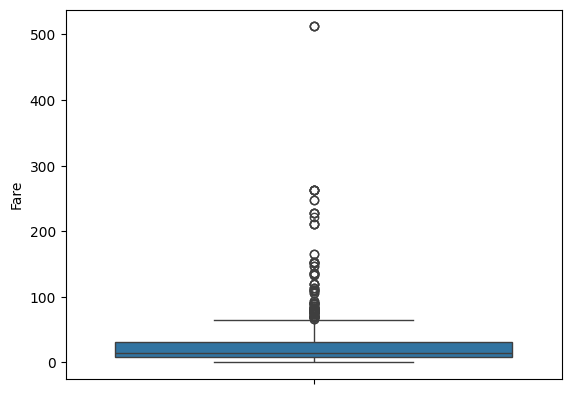

In [82]:
outlier(df, "Fare")

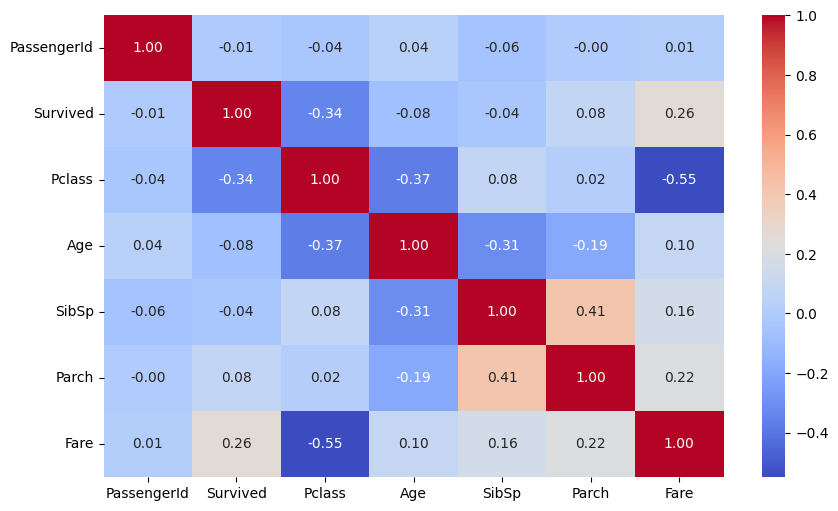

In [83]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

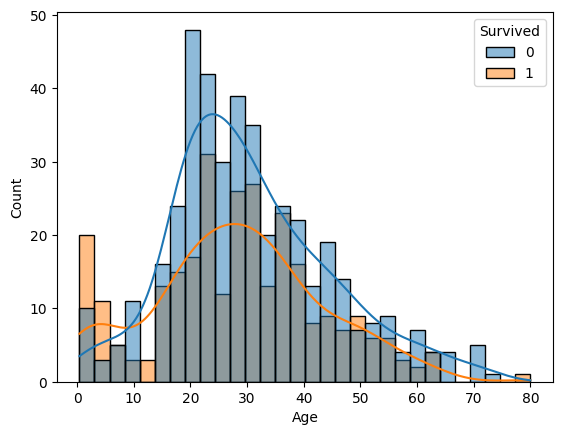

In [84]:
sns.histplot(data = df, x="Age", hue="Survived", bins=30, kde=True)
plt.show()

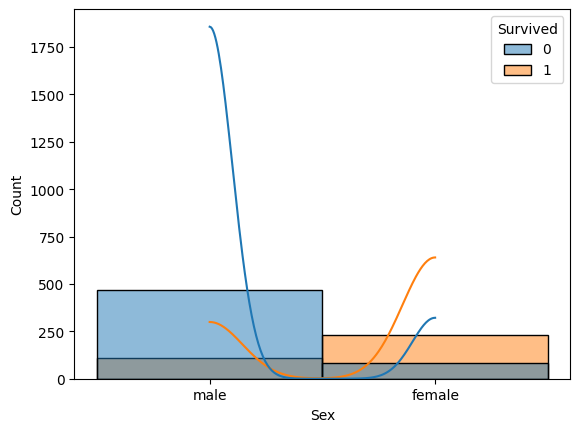

In [85]:
sns.histplot(data = df, x="Sex", hue="Survived", bins=30, kde=True)
plt.show()

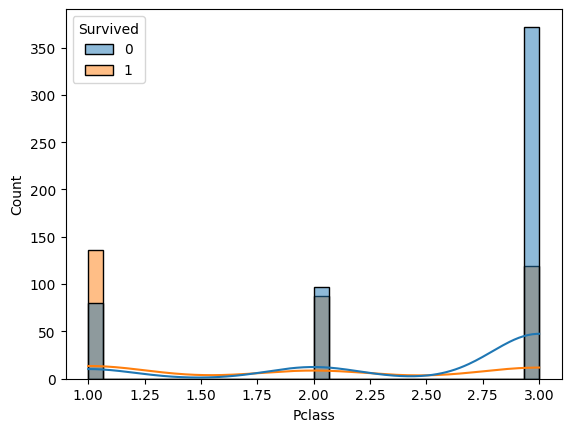

In [86]:
sns.histplot(data = df, x="Pclass", hue="Survived", bins=30, kde=True)
plt.show()

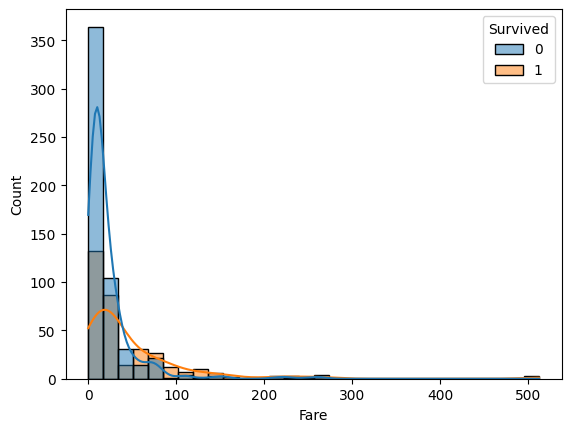

In [87]:
sns.histplot(data = df, x="Fare", hue="Survived", bins=30, kde=True)
plt.show()

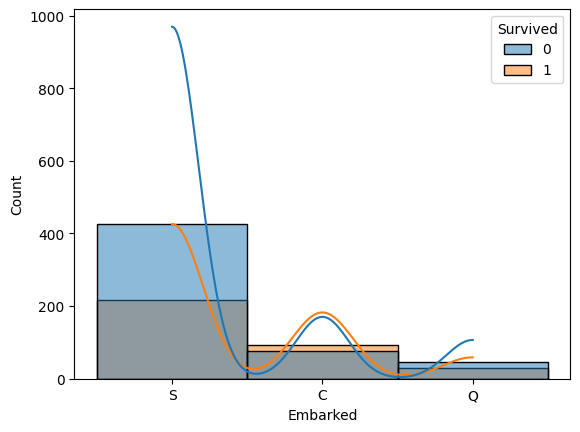

In [88]:
sns.histplot(data = df, x="Embarked", hue="Survived", bins=30, kde=True)
plt.show()

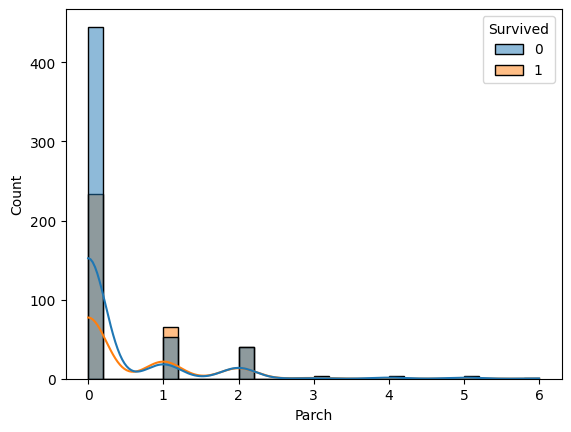

In [89]:
sns.histplot(data = df, x="Parch", hue="Survived", bins=30, kde=True)
plt.show()

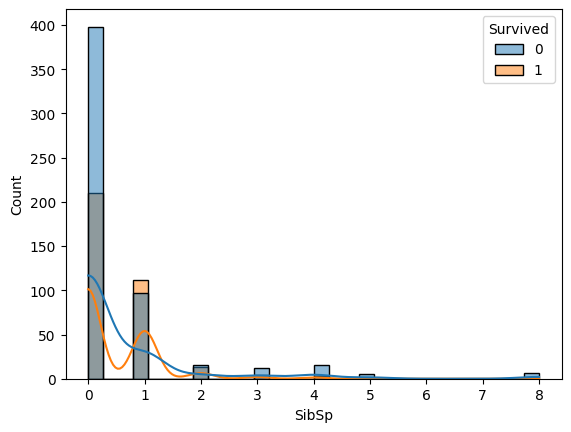

In [90]:
sns.histplot(data = df, x="SibSp", hue="Survived", bins=30, kde=True)
plt.show()

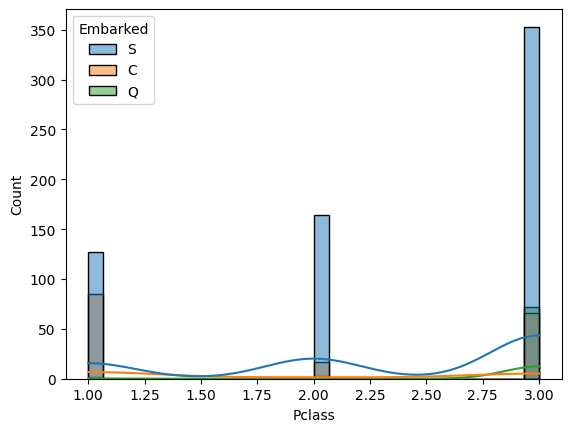

In [91]:
sns.histplot(data = df, x="Pclass", hue="Embarked", bins=30, kde=True)
plt.show()

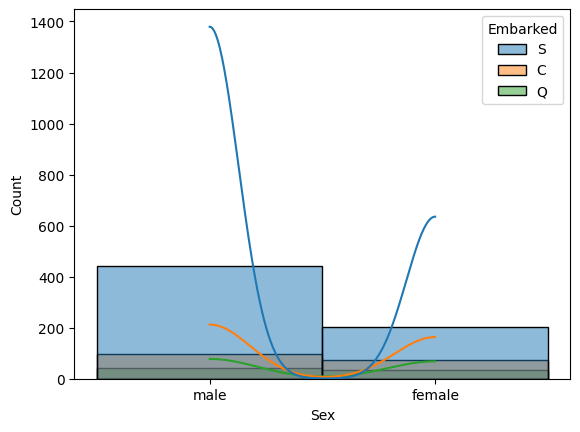

In [92]:
sns.histplot(data = df, x="Sex", hue="Embarked", bins=30, kde=True)
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
df["Age"].fillna(df["Age"].mode()[0], inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Cabin"].fillna(df["Cabin"].mode()[0], inplace=True)

/tmp/ipython-input-1435852887.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mode()[0], inplace=True)
/tmp/ipython-input-1435852887.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [95]:
df['Cabin'].nunique()

147

In [96]:
df = df.drop_duplicates(subset=["PassengerId"], keep=False)

In [97]:
df = df.drop_duplicates()

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
#standardizing and formatting categorical variables


In [100]:
df["Survived"].value_counts()

,count
Survived,
0,549
1,342


In [101]:
df["Pclass"].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [102]:
df["Sex"].value_counts()

,count
Sex,
male,577
female,314


In [103]:
df["Embarked"].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [104]:
#Removing irrelevant features
df.drop("PassengerId", axis=1, inplace=True)
df.drop("Name", axis=1, inplace=True)


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [106]:
df.drop("Cabin", axis=1, inplace=True)

In [107]:
df.drop("Ticket", axis=1, inplace=True)

In [108]:
gender = ["male", "female"]
df["Sex"] = pd.Categorical(df["Sex"], categories=gender)

In [109]:
df["Sex"] = df["Sex"].map({"male":1, "female":2}).astype(int)

In [110]:
station = ["S", "C", "Q"]
df["Embarked"] = pd.Categorical(df["Embarked"], categories=station)

In [111]:
df["Embarked"] = df["Embarked"].map({"S":1, "C":2, "Q":3}).astype(int)

In [112]:
df = pd.get_dummies(df, columns=["Pclass"], drop_first=False)

In [113]:
df["Children"] = df["Age"].apply(lambda x: 1 if x<=17 else 0)

In [114]:
df["Pclass_1"] = df["Pclass_1"].astype(int)
df["Pclass_2"] = df["Pclass_2"].astype(int)
df["Pclass_3"] = df["Pclass_3"].astype(int)

In [115]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


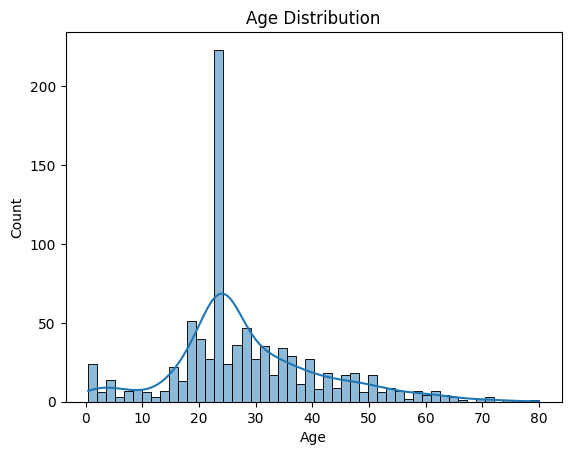

In [116]:
sns.histplot(df["Age"], bins=50, kde=True)
plt.title("Age Distribution")
plt.show()

In [117]:
skew_value = df["Age"].skew()
print("Skewness:", skew_value)

Skewness: 0.6577529069911331


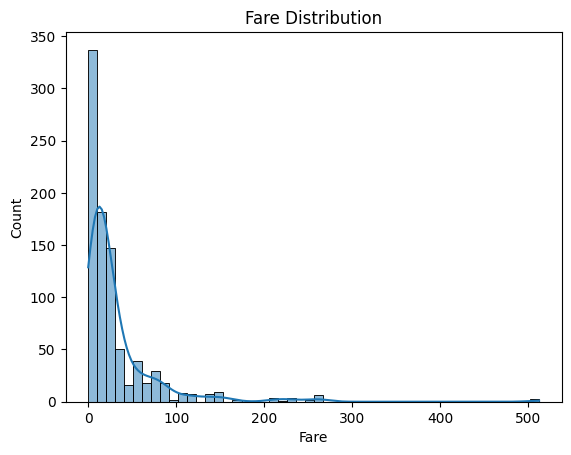

In [118]:
sns.histplot(df["Fare"], bins=50, kde=True)
plt.title("Fare Distribution")
plt.show()

In [119]:
skew_value = df["Fare"].skew()
print("Skewness:", skew_value)

Skewness: 4.787316519674893


In [120]:
df["Fare"] = np.log1p(df["Fare"])

# **Feature Selection**


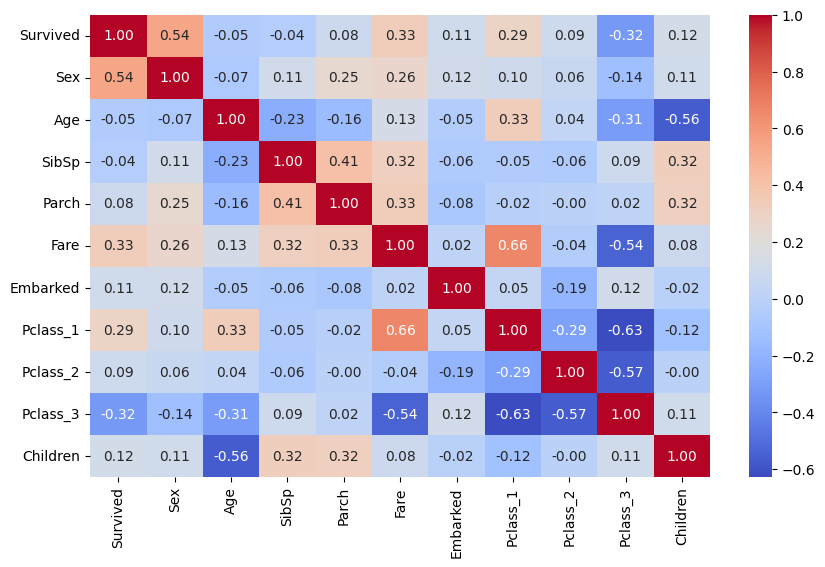

In [121]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif


X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Select top 7 best features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=7)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


selected_feature_names = X_train.columns[selector.get_support()]

print("Selected features:")
print(selected_feature_names.tolist())


Selected features:
['Sex', 'Parch', 'Fare', 'Embarked', 'Pclass_1', 'Pclass_3', 'Children']


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd


X = df.drop("Survived", axis=1)
y = df["Survived"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


selector = SelectFromModel(rf, prefit=True, threshold="median")
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


selected_mask = selector.get_support()
selected_feature_names = X_train.columns[selected_mask]


feature_importances = rf.feature_importances_
selected_importances = feature_importances[selected_mask]

result = pd.DataFrame({
    "Feature": selected_feature_names,
    "Importance": selected_importances
}).sort_values(by="Importance", ascending=False)

print("Selected features with their importance:")
print(result)


Selected features with their importance:
    Feature  Importance
3      Fare    0.275513
0       Sex    0.262282
1       Age    0.232596
4  Pclass_3    0.051616
2     SibSp    0.049183


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np


y = df['Survived']
X = df.drop(columns=['Survived'])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)


importance = np.abs(log_reg.coef_[0])


feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importance
}).sort_values(by='importance', ascending=False)

print(feature_importance)


    feature  importance
0       Sex    2.530982
9  Children    0.944753
8  Pclass_3    0.825837
6  Pclass_1    0.652674
4      Fare    0.499597
2     SibSp    0.423055
5  Embarked    0.317845
3     Parch    0.227166
7  Pclass_2    0.166481
1       Age    0.023543


In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np


y = df['Survived']
X = df.drop(columns=['Survived'])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)




svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)


importance = np.abs(svm_clf.coef_[0])


feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importance
}).sort_values(by='importance', ascending=False)

print(feature_importance)


    feature  importance
0       Sex    2.000628
9  Children    0.002325
8  Pclass_3    0.001845
2     SibSp    0.001379
6  Pclass_1    0.001301
5  Embarked    0.000852
3     Parch    0.000710
4      Fare    0.000581
7  Pclass_2    0.000544
1       Age    0.000061


Since dataset is small so we will only depend on Logistic Regression, SVM and Random Forest.

Since we already have less features so we will not be going for dimensionality reduction and also not removing any features

# **Model Building**

In [126]:
# y = df['Survived']
# X = df.drop(columns=['Survived'])


# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# log_reg = LogisticRegression(max_iter=1000, random_state=42)
# log_reg.fit(X_train, y_train)


In [127]:
# y_pred_proba = log_reg.predict_proba(X_test)


In [128]:
# from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

# y_pred = (y_pred_proba[:, 1] >= 0.42).astype(int)

# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

# print("Precision: " , precision)
# print("Recall: ", recall)

In [129]:
# y = df['Survived']
# X = df.drop(columns=['Survived'])


# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# svm_clf = SVC(probability=True, random_state=42)
# svm_clf.fit(X_train, y_train)


In [130]:
# y_pred_proba = svm_clf.predict_proba(X_test)

In [131]:
# y_pred = (y_pred_proba[:, 1] >= 0.45).astype(int)

# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

# print("Precision: " , precision)
# print("Recall: ", recall)

In [132]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

y = df['Survived']
X = df.drop(columns=['Survived'])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(random_state=80)
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=80)

In [133]:
y_pred_proba = rf.predict_proba(X_test)

In [134]:
y_pred = (y_pred_proba[:, 1] >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision: " , precision)
print("Recall: ", recall)

Confusion Matrix:
[[96 14]
 [17 52]]
Precision:  0.7878787878787878
Recall:  0.7536231884057971


So we are going to use random forest classifier model

# **Final Prediction**

In [135]:
df_test = pd.read_csv("test.csv")

In [136]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [137]:
df_test.shape

(418, 11)

In [138]:
df_test["Age"].fillna(df_test["Age"].mode()[0], inplace=True)
df_test["Embarked"].fillna(df_test["Embarked"].mode()[0], inplace=True)
df_test["Cabin"].fillna(df_test["Cabin"].mode()[0], inplace=True)

/tmp/ipython-input-3312679934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["Age"].fillna(df_test["Age"].mode()[0], inplace=True)
/tmp/ipython-input-3312679934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [140]:
df_test.drop("Name", axis=1, inplace=True)

In [141]:
id = df_test["PassengerId"]
df_test.drop("PassengerId", axis=1, inplace=True)

In [142]:
df_test.drop("Cabin", axis=1, inplace=True)
df_test.drop("Ticket", axis=1, inplace=True)

In [143]:
gender = ["male", "female"]
df_test["Sex"] = pd.Categorical(df_test["Sex"], categories=gender)

In [144]:
df_test["Sex"] = df_test["Sex"].map({"male":1, "female":2}).astype(int)

In [145]:
station = ["S", "C", "Q"]
df_test["Embarked"] = pd.Categorical(df_test["Embarked"], categories=station)

In [146]:
df_test["Embarked"] = df_test["Embarked"].map({"S":1, "C":2, "Q":3}).astype(int)

In [147]:
df_test = pd.get_dummies(df_test, columns=["Pclass"], drop_first=False)

In [148]:
df_test["Children"] = df_test["Age"].apply(lambda x: 1 if x<=17 else 0)

In [150]:
df_test["Pclass_1"] = df_test["Pclass_1"].astype(int)
df_test["Pclass_2"] = df_test["Pclass_2"].astype(int)
df_test["Pclass_3"] = df_test["Pclass_3"].astype(int)

In [151]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)


In [152]:
df_test["Fare"] = np.log1p(df_test["Fare"])

In [153]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    int64  
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      417 non-null    float64
 5   Embarked  418 non-null    int64  
 6   Pclass_1  418 non-null    int64  
 7   Pclass_2  418 non-null    int64  
 8   Pclass_3  418 non-null    int64  
 9   Children  418 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 32.8 KB


In [154]:
y_pred_proba = rf.predict_proba(df_test)

In [155]:
df_test["Survived"] = (y_pred_proba[:, 1] >= 0.5).astype(int)

In [163]:
df_test.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Children,Survived,PassengerId
0,1,34.5,0,0,2.178064,3,0,0,1,0,0,892
1,2,47.0,1,0,2.079442,1,0,0,1,0,0,893
2,1,62.0,0,0,2.369075,3,0,1,0,0,0,894
3,1,27.0,0,0,2.268252,1,0,0,1,0,1,895
4,2,22.0,1,1,2.586824,1,0,0,1,0,0,896


In [162]:
df_test = pd.concat([df_test, id], axis=1)

In [161]:
id.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [164]:
final_file = df_test[["PassengerId", "Survived"]]

In [165]:
final_file.to_csv("titanic.csv", index=False)